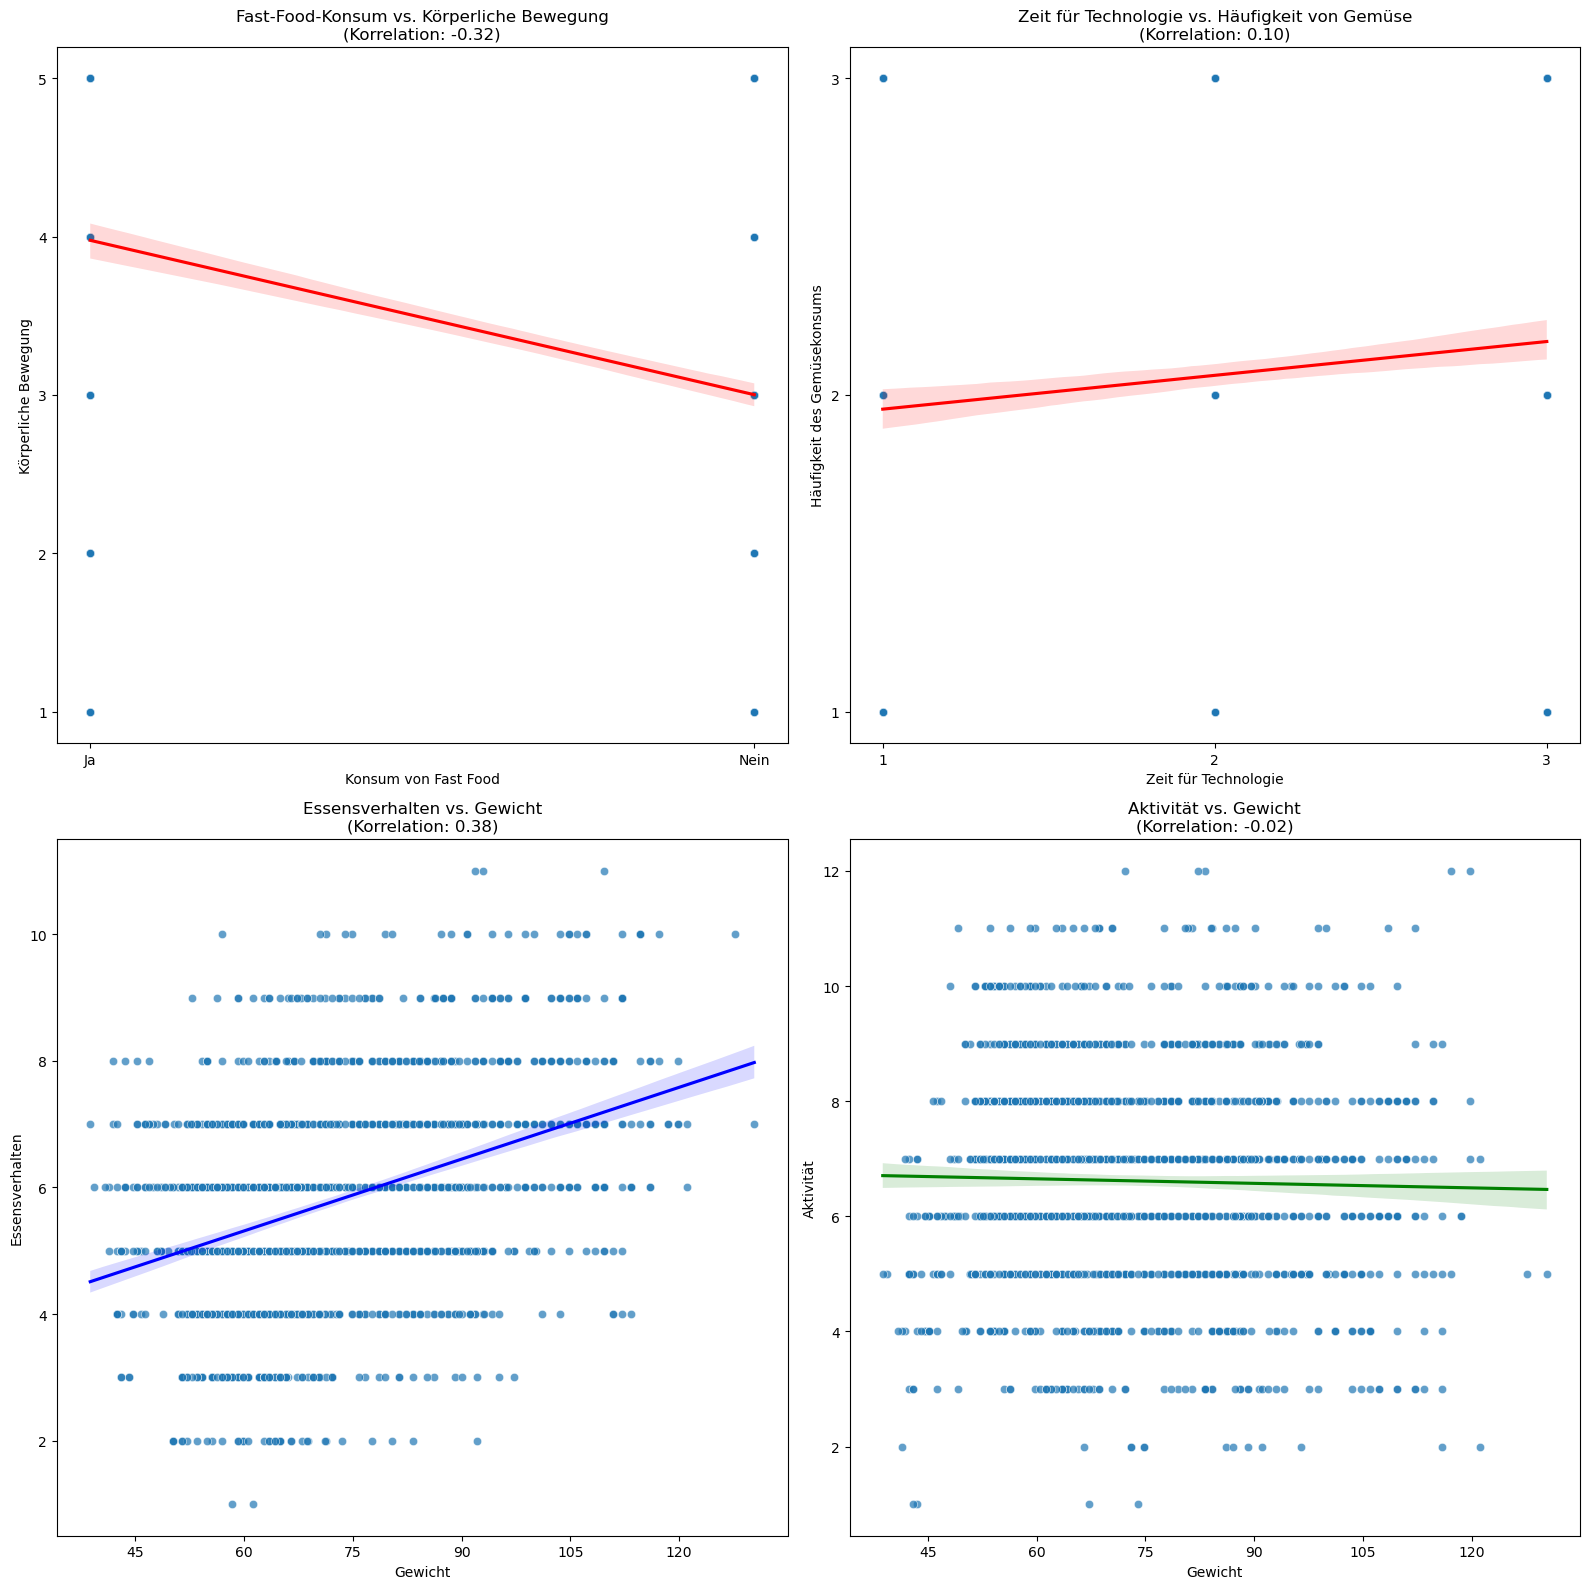

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

# CSV-Datei von der Festplatte laden
file_path = "data/Obesity_Dataset_FE.xlsx"

# Excel-Datei laden
obesity_data = pd.read_excel(file_path)

# Sicherstellen, dass alle benötigten Spalten in den Daten vorhanden sind
required_columns = [
    'Consumption_of_Fast_Food', 'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
    'Frequency_of_Consuming_Vegetables', 'FoodConsumption', 'Weight', 'Activity'
]

missing_columns = [col for col in required_columns if col not in obesity_data.columns]
if missing_columns:
    raise ValueError(f"Die folgenden Spalten fehlen in den Daten: {', '.join(missing_columns)}")

# Berechnung der Korrelationen
correlation_ff_exercise = obesity_data['Consumption_of_Fast_Food'].corr(obesity_data['Physical_Excercise'])
correlation_tech_vegetables = obesity_data['Schedule_Dedicated_to_Technology'].corr(
    obesity_data['Frequency_of_Consuming_Vegetables']
)
correlation_food_weight = obesity_data['FoodConsumption'].corr(obesity_data['Weight'])
correlation_activity_weight = obesity_data['Activity'].corr(obesity_data['Weight'])

# Visualisierung der Beziehungen
plt.figure(figsize=(16, 16))

# Plot 1: Fast-Food-Konsum vs. Körperliche Bewegung
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='Consumption_of_Fast_Food',
    y='Physical_Excercise',
    data=obesity_data,
    alpha=0.7
)
sns.regplot(
    x='Consumption_of_Fast_Food',
    y='Physical_Excercise',
    data=obesity_data,
    scatter=False,
    color='red'
)
plt.title(f"Fast-Food-Konsum vs. Körperliche Bewegung\n(Korrelation: {correlation_ff_exercise:.2f})")
plt.xlabel("Konsum von Fast Food")
plt.ylabel("Körperliche Bewegung")
plt.gca().set_xticks([1, 2])
plt.gca().set_xticklabels(["Ja", "Nein"])
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot 2: Zeit für Technologie vs. Häufigkeit von Gemüse
plt.subplot(2, 2, 2)
sns.scatterplot(
    x='Schedule_Dedicated_to_Technology',
    y='Frequency_of_Consuming_Vegetables',
    data=obesity_data,
    alpha=0.7
)
sns.regplot(
    x='Schedule_Dedicated_to_Technology',
    y='Frequency_of_Consuming_Vegetables',
    data=obesity_data,
    scatter=False,
    color='red'
)
plt.title(f"Zeit für Technologie vs. Häufigkeit von Gemüse\n(Korrelation: {correlation_tech_vegetables:.2f})")
plt.xlabel("Zeit für Technologie")
plt.ylabel("Häufigkeit des Gemüsekonsums")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot 3: Essensverhalten vs. Gewicht
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='Weight',
    y='FoodConsumption',
    data=obesity_data,
    alpha=0.7
)
sns.regplot(
    x='Weight',
    y='FoodConsumption',
    data=obesity_data,
    scatter=False,
    color='blue'
)
plt.title(f"Essensverhalten vs. Gewicht\n(Korrelation: {correlation_food_weight:.2f})")
plt.xlabel("Gewicht")
plt.ylabel("Essensverhalten")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot 4: Aktivität vs. Gewicht
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='Weight',
    y='Activity',
    data=obesity_data,
    alpha=0.7
)
sns.regplot(
    x='Weight',
    y='Activity',
    data=obesity_data,
    scatter=False,
    color='green'
)
plt.title(f"Aktivität vs. Gewicht\n(Korrelation: {correlation_activity_weight:.2f})")
plt.xlabel("Gewicht")
plt.ylabel("Aktivität")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()
